<a href="https://colab.research.google.com/github/Actulus/IntelligensModszerekTantargy/blob/main/Kiertekeles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Adatok betöltése**

In [34]:
!pip install six

In [35]:
import numpy as np
data_with_labels = np.loadtxt('https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data', delimiter=',')

In [36]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.names

column_names = []
with open("spambase.names") as f:
  for i in range(33):
    f.readline()

  for i in range(57):
    line = f.readline()
    column_names.append(line.split(":")[0])

--2025-04-04 14:44:33--  https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.names
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘spambase.names.1’

spambase.names.1        [ <=>                ]   3.48K  --.-KB/s    in 0s      

2025-04-04 14:44:34 (589 MB/s) - ‘spambase.names.1’ saved [3566]



**1. feladat: keresztvalidációs protokollok**

Osztályozza az adatokat döntési fával és értékelje ki a modellt 10-szeres keresztvalidációval.

(a) Az *sklearn.model_selection* csomagbeli *StratifiedKFold* használatával határozza meg, hogy mely példányok kerülnek a tanító és teszt halmazokba a keresztvalidáció egyes "fordulóiban". Írassa ki a tanító és teszt példányok indexeit (sorszámait) az egyes "fordulókban"! Egészítse ki az alábbi kódot!

(b) Ellenőrizze, hogy ugyanazon index (sorszám) nem fordul elő a tanító és teszt indexek között!

(c) Ön szerint miért volt szükség arra, hogy a split(...) metódus bemenetként megkapja az adatokat és azok osztálycímkéit, holott mindössze indexeket (sorszámokat) adott vissza, adatpéldányokat nem. Elég lenne a példányok számának ismerete a split(...) metódus által végzett funkcionalitás megvalósításához?

(d) Többször egymás után futtatva a kódot, ugyanazok a példányok kerülnek-e tanító és teszthalmazba a keresztvalidáció egyes fordulóiban? Állítsa a *random_state*-t, hogy többszöri futtatás során ugyanazon felosztásokat kapjuk! Miért előnyös a *random_state* állítása?

(e) A StratifiedKFold-tól kapott indexeket használva ossza fel az adatokat tanító és tesztadatokra és tanítson egy-egy döntési fát a keresztvalidáció minden fordulójában. A fa legnagyobb mélysége legfeljebb 3 legyen! Emlékeztetőül, a döntési fa tanításához előző órán ezt a kódot használtuk:

    from sklearn.tree import DecisionTreeClassifier
    
    model = DecisionTreeClassifier(max_depth=4)
    model.fit(data_train, labels_train)

Az egyes modelleket egy *models* elnevezésű listába tárolja el.

(f) Értékelje ki a modelleket az egyes fordulókban, és tárolja el a modellek pontosságát (helyesen osztályozott példányok arányát) egy *accuracies* elnevezésű listába! Emlékeztetőül, a tanítotott modell predikcióit a predict(...) függvénnyel tudjuk kiszámolni:

    pred = model.predict(data_test)

(g) Számolja ki a modell átlagos pontosságát, a pontosság szórását, minimumát és maximumát!

(h) A megadott kód segítségével jelenítse meg 10-szeres keresztvalidáció egyes fordulóiban kapott döntési fákat és hasonlítsa össze ezeket! Lát-e különbségetek? Mi lehet ennek az oka?

(i) Tanítson egy modellt az **összes** rendelkezésre álló adat felhasználásával *best_model* néven! Mit tud elmondani ennek a modellnek a pontosságáról?


In [37]:
# (a)-(g) részfeladatokhoz kapcsolódó kiegészítendő kód

from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

skf = StratifiedKFold(n_splits = 10)

data = data_with_labels[:,:-1]
labels = data_with_labels[:,-1]

models = []
accuracies = []
fold = 1

for train_index, test_index in skf.split(data, labels):
  print(f"\nFold {fold}")
  print("Train indices:", train_index)
  print("Test indices:", test_index)

  # atfedes ellenorzese
  assert len(set(train_index) & set(test_index)) == 0, "Átfedés van a tanító és teszt indexek között!"

  # adathalmazok letrehozasa
  data_train   = data[train_index]
  data_test    = data[test_index]
  labels_train = labels[train_index]
  labels_test  = labels[test_index]

  # dontesi fa letrehozasa
  model = DecisionTreeClassifier(max_depth=3, random_state=42)
  model.fit(data_train, labels_train)
  models.append(model)

  # elorejelzes, pontossag
  predictions = model.predict(data_test)
  accuracy = accuracy_score(labels_test, predictions)
  accuracies.append(accuracy)

  print(f"Pontosság: {accuracy:.4f}")
  fold += 1

# kiertekeles
print("\n--- Keresztvalidációs összegzés ---")
print(f"Átlagos pontosság: {np.mean(accuracies):.4f}")
print(f"Szórás: {np.std(accuracies):.4f}")
print(f"Minimum pontosság: {np.min(accuracies):.4f}")
print(f"Maximum pontosság: {np.max(accuracies):.4f}")


Fold 1
Train indices: [ 182  183  184 ... 4598 4599 4600]
Test indices: [   0    1    2    3    4    5    6    7    8    9   10   11   12   13
   14   15   16   17   18   19   20   21   22   23   24   25   26   27
   28   29   30   31   32   33   34   35   36   37   38   39   40   41
   42   43   44   45   46   47   48   49   50   51   52   53   54   55
   56   57   58   59   60   61   62   63   64   65   66   67   68   69
   70   71   72   73   74   75   76   77   78   79   80   81   82   83
   84   85   86   87   88   89   90   91   92   93   94   95   96   97
   98   99  100  101  102  103  104  105  106  107  108  109  110  111
  112  113  114  115  116  117  118  119  120  121  122  123  124  125
  126  127  128  129  130  131  132  133  134  135  136  137  138  139
  140  141  142  143  144  145  146  147  148  149  150  151  152  153
  154  155  156  157  158  159  160  161  162  163  164  165  166  167
  168  169  170  171  172  173  174  175  176  177  178  179  180  181
 181

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

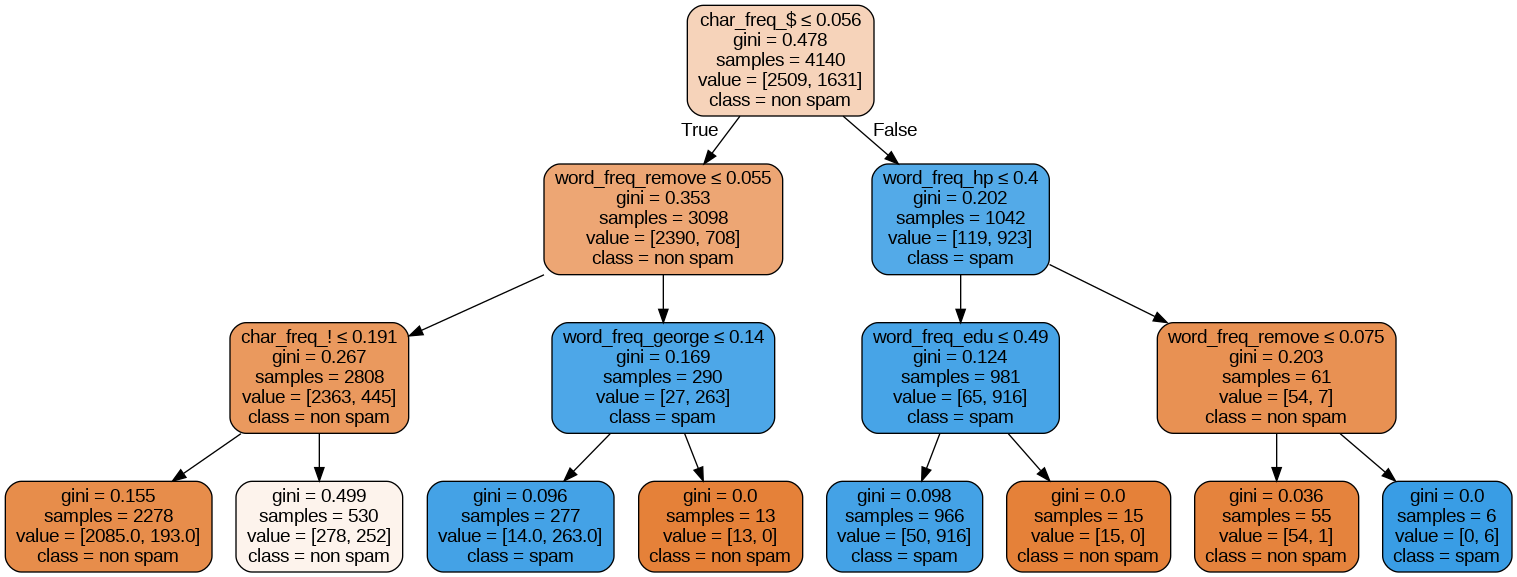

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

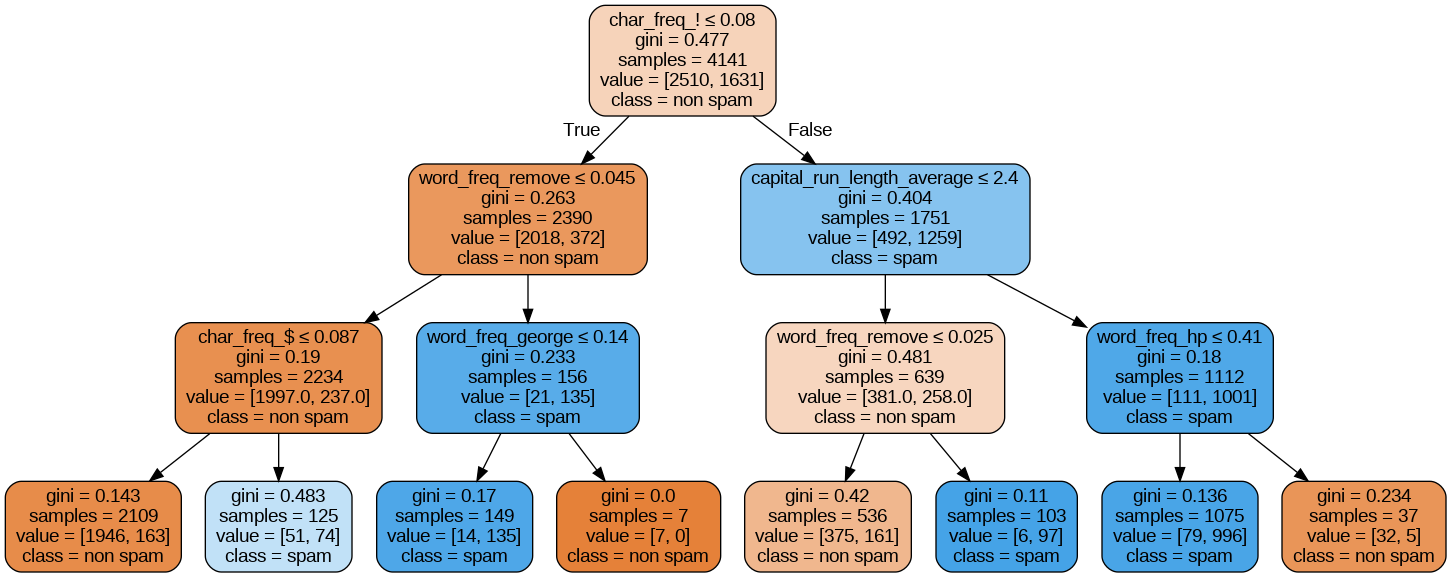

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

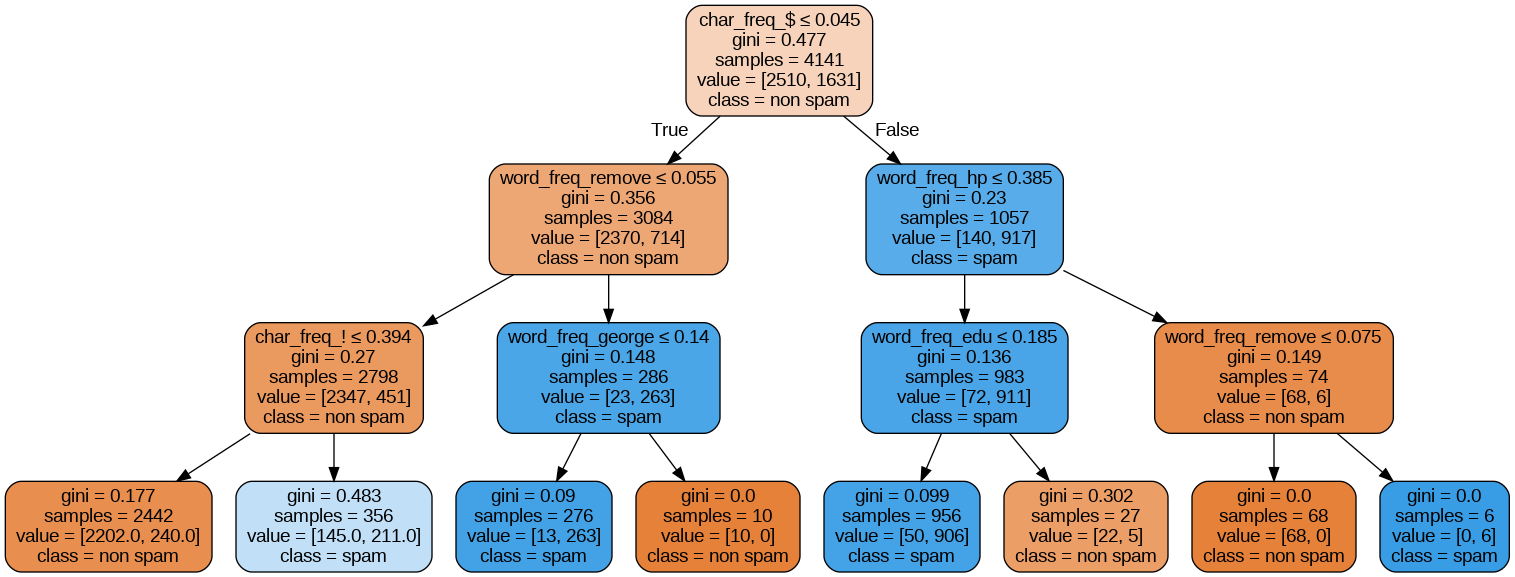

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

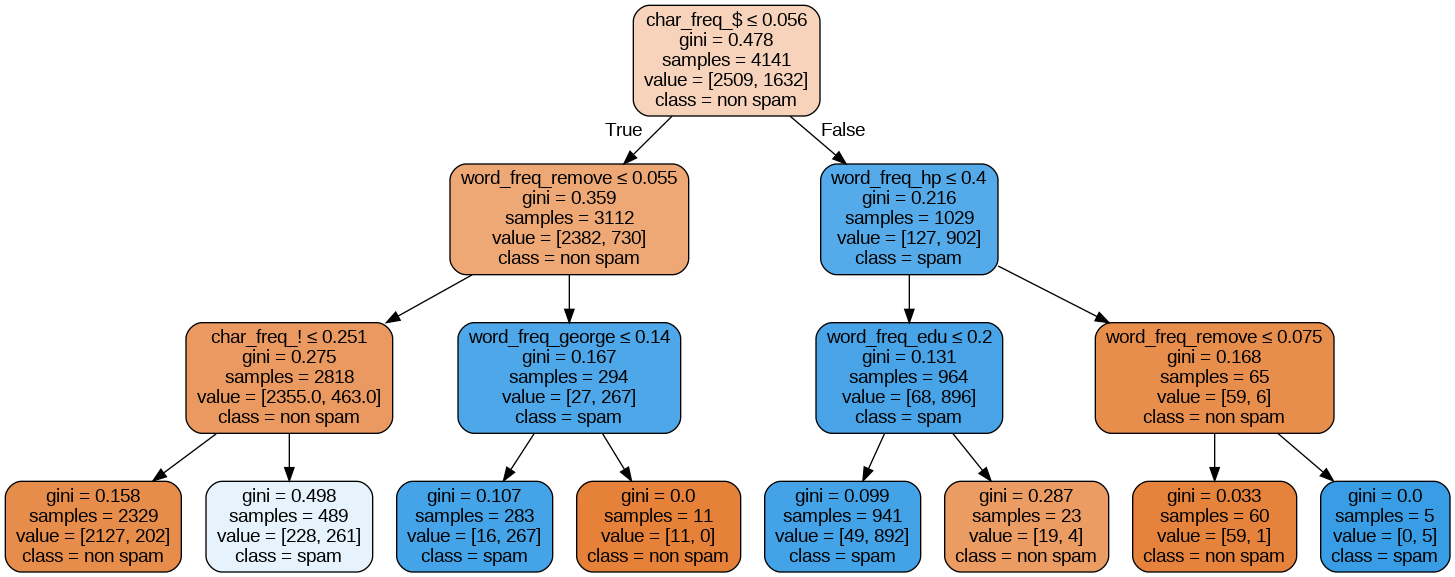

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

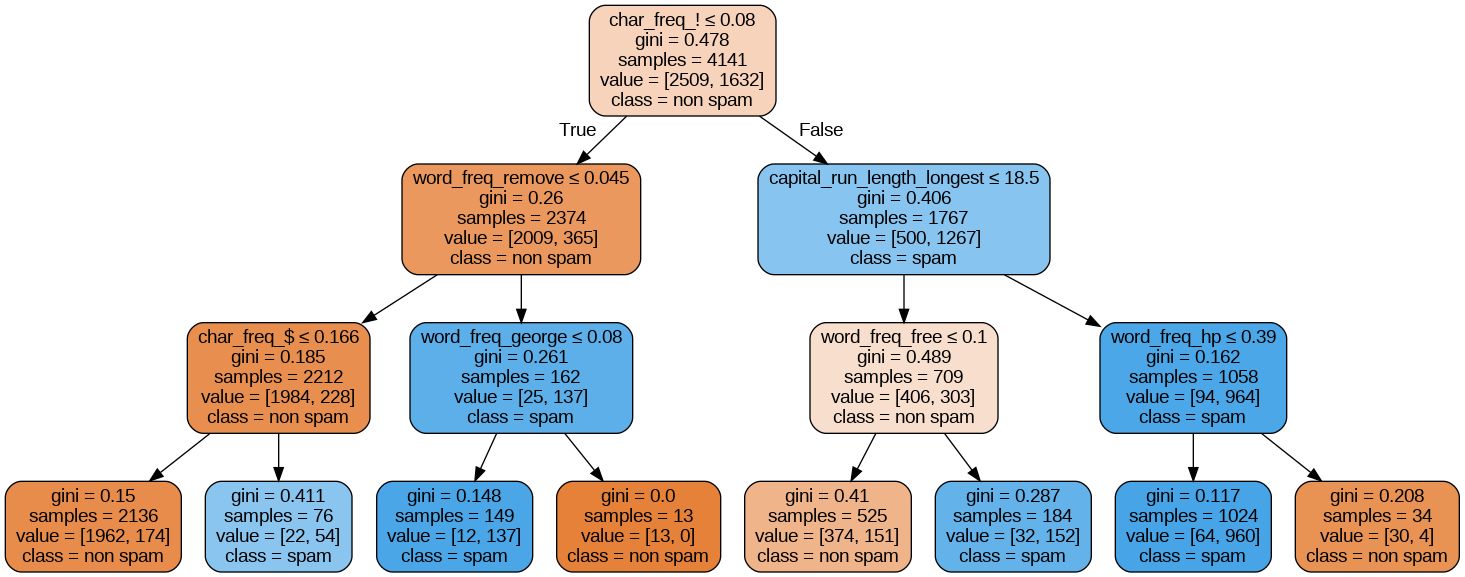

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

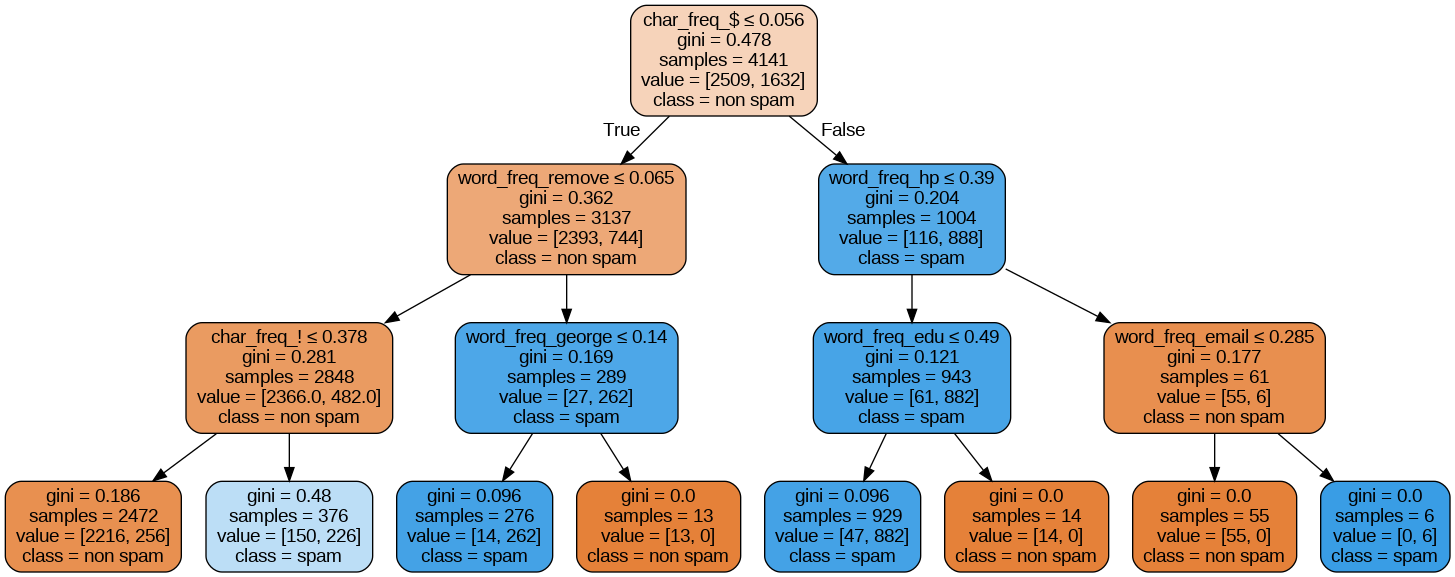

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

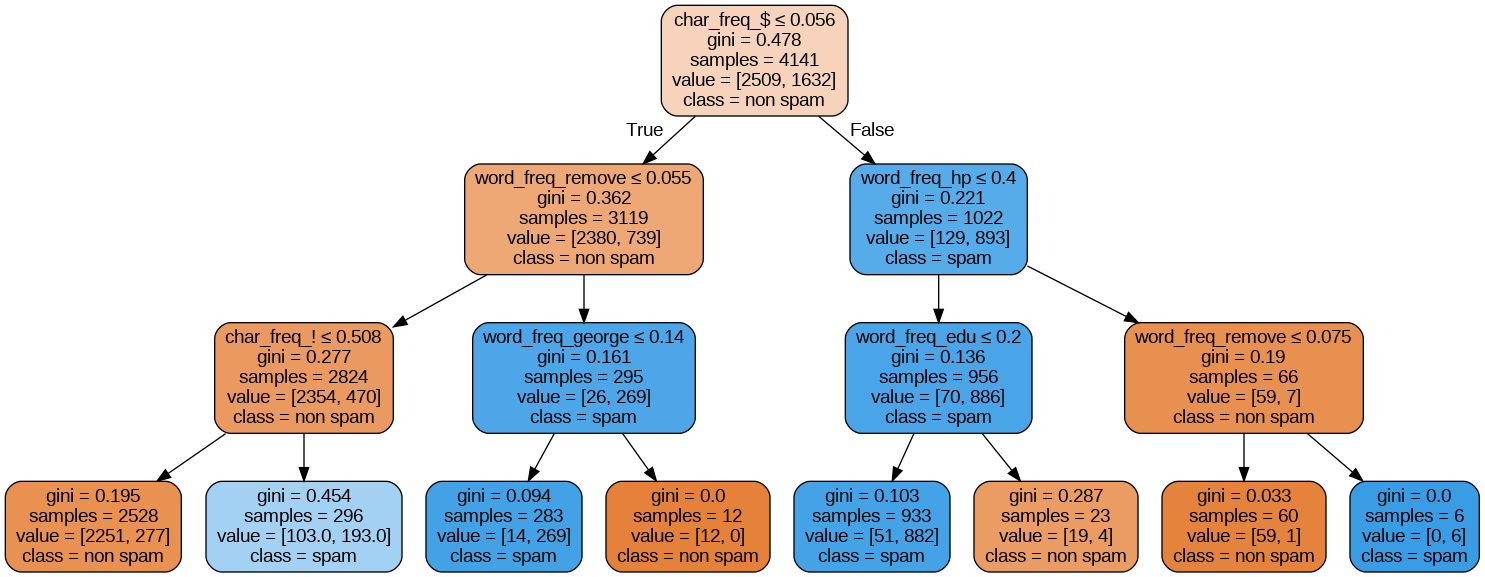

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

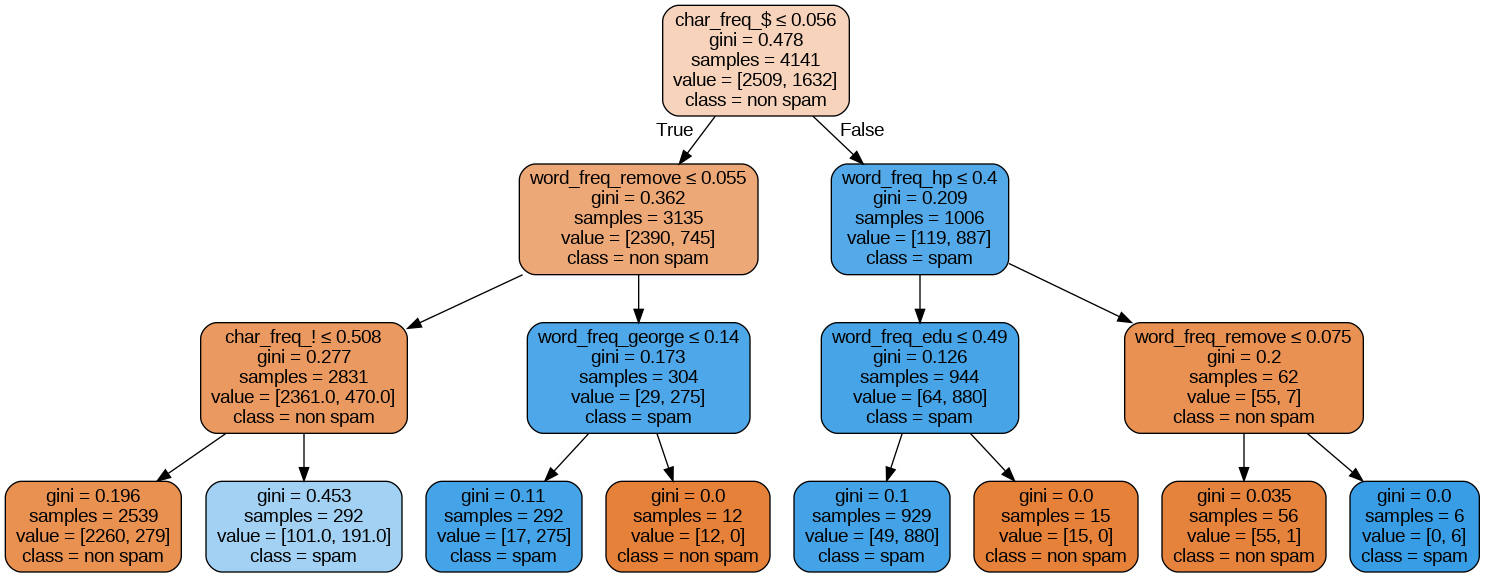

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

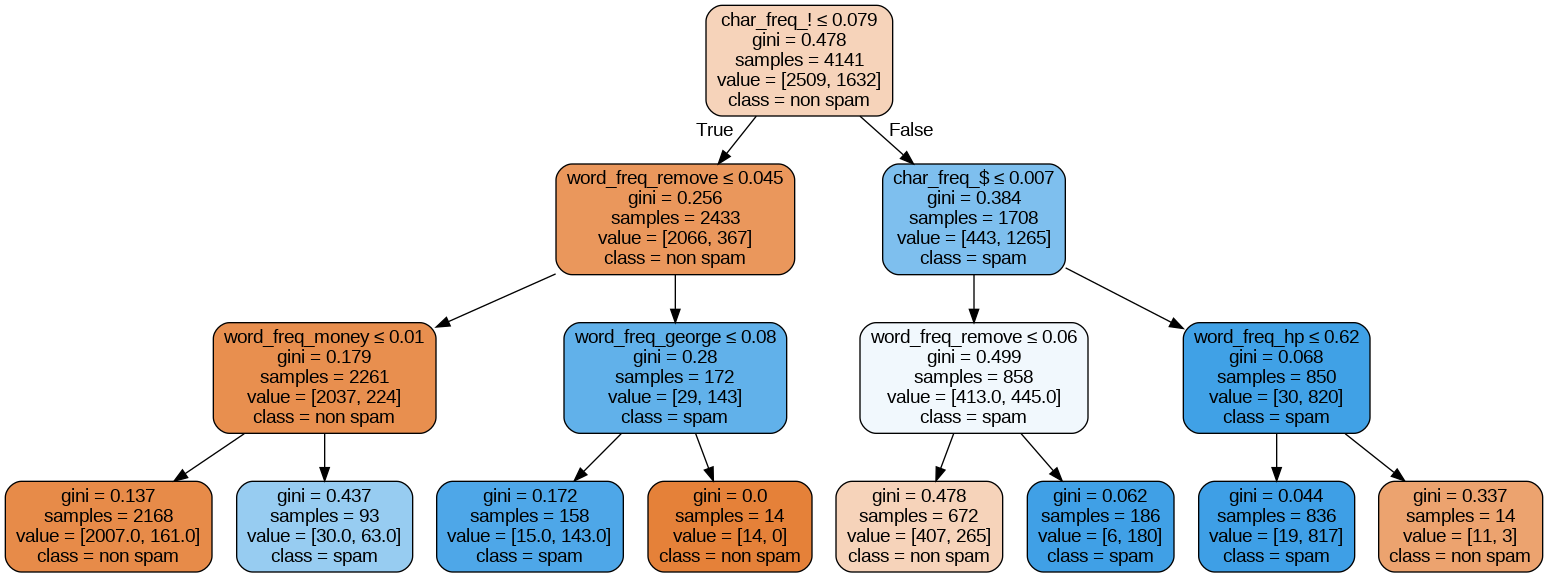

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

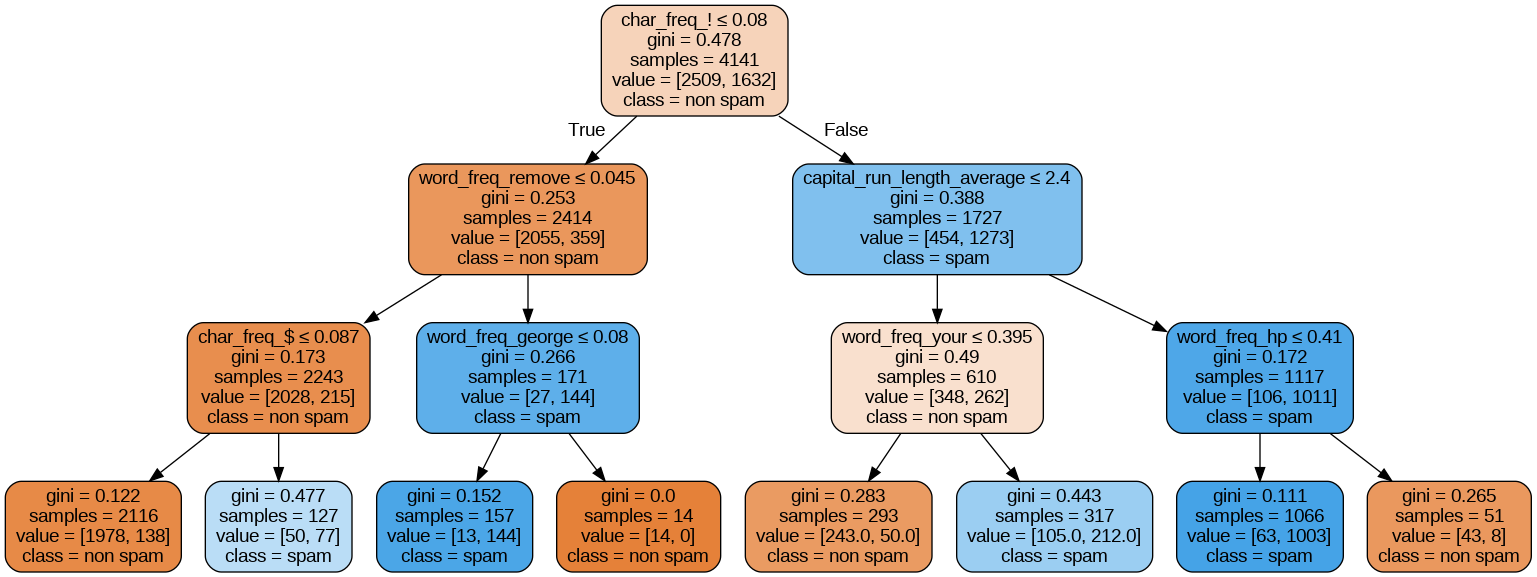

<IPython.core.display.Javascript object>

In [38]:
# (h) részfeladathoz kapcsolódó kód

from six import StringIO
from sklearn.tree import export_graphviz
import pydot
from IPython.display import Image
from google.colab import widgets

tb = widgets.TabBar([str(i) for i in range(10)], location='top')
for i in range(10):
  with tb.output_to(i):
    dot_data = StringIO()
    export_graphviz(models[i], out_file=dot_data, feature_names=column_names, \
                        class_names=['non spam', 'spam'], filled=True, rounded=True, \
                        special_characters=True)
    graph = pydot.graph_from_dot_data(dot_data.getvalue())
    display(Image(graph[0].create_png()))

In [39]:
# (i) modell az összes rendelkezésre álló adat felhasználásával best_model néven

best_model = DecisionTreeClassifier(max_depth=3, random_state=42)
best_model.fit(data, labels)

# modell pontossága
predictions = best_model.predict(data)
accuracy = accuracy_score(labels, predictions)
print(f"Best model accuracy: {accuracy:.4f}")

Best model accuracy: 0.8889


**2. feladat: kiértékelési metrikák: Precision, Recall, F-measure**

Tanítson egy logisztikus regressziós modellet az előbbi spam-felismerési feladatra a megadott kód segítségével! A *predict_proba* metódust használva a logisztikus regresszió egy 0 és 1 közötti valószínűséget prediktál minden osztályra, amely azt adja meg, hogy mekkora eséllyel tartozik egy-egy példány az egyes osztályokba. Feltételezve, hogy 0.5 feletti valószínűség esetén a modell az adott e-mail-t spam-ként osztályozta, és azt, hogy a "spam" osztályt tekintjük a pozitív osztálynak,

(a) számolja ki az osztályozó precision-ét (azt, hogy a pozitívnak prediktált példányok mekkora része pozitív ténylegesen),

(b) recall-át (azt, hogy a ténylegesen pozitív példányok mekkora részét prediktálta a modell pozitívnak), és

(c) f-measure-ét (precision és recall harmónikus közepét)!

(d) Írjon egy függvényt, amely tetszőleges küszöbszám mellett kiszámolja a precision-t és recall-t.

(e) Az előbbi függvényt meghívva mentse le a precision és recall értékeket 0.1, 0.2, 0.3, 0.4, ... 0.9 küszöbszámok mellett egy *precisions* ill. *recalls* elnevezésű listába. A megadott kód segítségével ábrázolja a kapott precision és recall értékeket!

(f) A precision-recall görbe alatti terület használható a modell pontosságának mérésére. Ugyanakkor ez a mérék túlságosan optimista lehet(*), egy jobb eljárás a modell pontosságának mérésére az összes lehetséges recall szint melletti precision átlaga, amely egyben közelítése a precision-recall görbe alatti területnek. Számolja ki a modell pontosságát az sklearn.metrics csomagbeli average_precision_score függvényt használva! Ha szükséges, tanulmányozza az alábbi dokumentációt:

(*) https://scikit-learn.org/stable/modules/generated/sklearn.metrics.average_precision_score.html


In [40]:
from sklearn.linear_model import LogisticRegression

test_indices = np.array(range(0,len(data),5))
train_indices = [i for i in range(len(data)) if i not in test_indices]

data_train   = data[train_indices]
data_test    = data[test_indices]
labels_train = labels[train_indices]
labels_test  = labels[test_indices]

model = LogisticRegression(solver="liblinear")
model.fit(data_train, labels_train)

pred = model.predict_proba(data_test)

In [41]:
# (a)-(c)
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(labels_test, pred[:,1] >= 0.5)
recall = recall_score(labels_test, pred[:,1] >= 0.5)
f_measure = f1_score(labels_test, pred[:,1] >= 0.5)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F-measure: {f_measure:.4f}")

Precision: 0.9244
Recall: 0.8760
F-measure: 0.8996


In [42]:
# (d)

def precision_recall(probs, labels, threshold):
  preds = (probs >= threshold).astype(int)
  precision = precision_score(labels, preds)
  recall = recall_score(labels, preds)

  return precision, recall

probs = model.predict_proba(data)[:, 1]  # Csak a pozitív (spam) osztály valószínűségei

thresholds = np.arange(0.1, 1.0, 0.1)
precisions = []
recalls = []

for threshold in thresholds:
  precision, recall = precision_recall(probs, labels, threshold)
  precisions.append(precision)
  recalls.append(recall)

print(precisions)
print(recalls)

[0.6782608695652174, 0.7732634338138925, 0.8501240694789082, 0.8968085106382979, 0.9267315397824842, 0.9401088929219601, 0.9516655780535598, 0.9596250901225667, 0.9726390114739629]
[0.9895201323772752, 0.9762824048538334, 0.9448428019856592, 0.9299503585217871, 0.8929950358521788, 0.8571428571428571, 0.8036403750689465, 0.734142305570877, 0.6078323221180364]


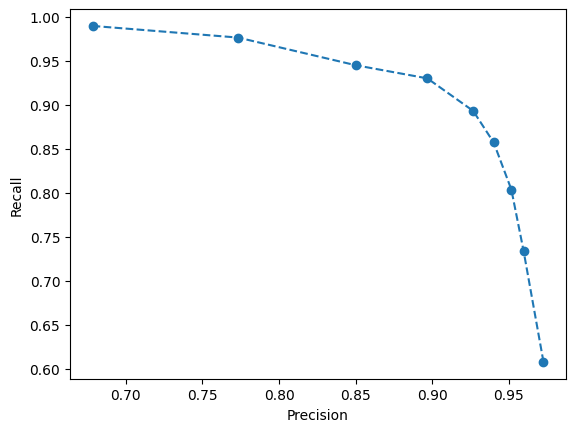

In [43]:
# (e) részfeladathoz kapcsolódó kód precision és recall ábrázolására
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.plot(precisions, recalls, linestyle='--', marker='o');

In [44]:
# (f)
from sklearn.metrics import average_precision_score

avg_precision = average_precision_score(labels, probs)
print(f"(f) Átlagos precision (average_precision_score): {avg_precision:.4f}")

(f) Átlagos precision (average_precision_score): 0.9598


**3. feladat: precision, recall, f-measure 10-szeres keresztvalidáció mellett**

(a) Az előbbi kódokból kiindulva tanítson logisztikus regressziót spam felismerésre 10-szeres keresztvalidáció mellett. A keresztvalidáció minden fordulójában számolja ki a precision, recall és f-measure értékét 0.5-ös küszöbszám mellett, és mentse el ezeket *prec_lr*, *recall_lr* és *f_lr* listákba.

(b) Számolja ki a 10 fordulóban kapott precision, recall és f-measure átlagát! Számolja ki az átlagos precision és átlagos recall harmónikus közepét! Hasonlítsa össze az f-measure-k átlagával!

(c) Hogyan tudnánk precision-t, recall-t és f-measure-t számolni többosztályos osztályozási feladatoknál, ahol nem csak két osztály van?

In [45]:
# (a)

prec_lr = []
recall_lr = []
f_lr = []

for train_index, test_index in skf.split(data, labels):
    data_train, data_test = data[train_index], data[test_index]
    labels_train, labels_test = labels[train_index], labels[test_index]

    model = LogisticRegression(max_iter=1000, random_state=42, solver="liblinear")
    model.fit(data_train, labels_train)

    probs = model.predict_proba(data_test)[:, 1]  # csak pozitív (spam) valószínűség
    preds = (probs >= 0.5).astype(int)

    prec = precision_score(labels_test, preds)
    rec = recall_score(labels_test, preds)
    f1 = f1_score(labels_test, preds)

    prec_lr.append(prec)
    recall_lr.append(rec)
    f_lr.append(f1)

In [46]:
# (b)

# atlagok
avg_prec = np.mean(prec_lr)
avg_rec = np.mean(recall_lr)
avg_f1 = np.mean(f_lr)

# harmonikus kozep
harmonic_f = 2 * avg_prec * avg_rec / (avg_prec + avg_rec)

print(f"(b) Átlagos precision: {avg_prec:.4f}")
print(f"    Átlagos recall:    {avg_rec:.4f}")
print(f"    Átlagos F1-score:  {avg_f1:.4f}")
print(f"    Harmónikus közép (átlag prec. és rec.): {harmonic_f:.4f}")

(b) Átlagos precision: 0.9081
    Átlagos recall:    0.8869
    Átlagos F1-score:  0.8967
    Harmónikus közép (átlag prec. és rec.): 0.8974


In [47]:
# (c) minden osztalynak atlagot szamolunk, majd ezeket felhasznalva szamoljuk ki az egyszeru atlagukat?

**4. feladat: szignifikanciavizsgálat t-próbával**

(a) Módosítsa a 3-dik feladatban elkészített kódot úgy, hogy fordulónként lementi a helyesen osztályozott példányok arányát az *accuracies_lr* elnevezésű tömbbe. Számolja ki az átlagos accuracy-t.

(b) A scipy.stats csomagbeli ttest_rel függvényt használva döntse el, hogy van-e szignifikáns különbség a két osztályozó teljesítménye között!

In [48]:
# (a)

accuracies_lr = []

for train_index, test_index in skf.split(data, labels):
    data_train, data_test = data[train_index], data[test_index]
    labels_train, labels_test = labels[train_index], labels[test_index]

    model = LogisticRegression(max_iter=1000, random_state=42, solver="liblinear")
    model.fit(data_train, labels_train)

    probs = model.predict_proba(data_test)[:, 1]
    preds = (probs >= 0.5).astype(int)

    # Eddigiek
    prec_lr.append(precision_score(labels_test, preds))
    recall_lr.append(recall_score(labels_test, preds))
    f_lr.append(f1_score(labels_test, preds))

    # Új: accuracy mentése
    acc = accuracy_score(labels_test, preds)
    accuracies_lr.append(acc)

# Átlagos pontosság
avg_accuracy_lr = np.mean(accuracies_lr)
print(f"(a) Átlagos accuracy (logisztikus regresszió): {avg_accuracy_lr:.4f}")

(a) Átlagos accuracy (logisztikus regresszió): 0.9191


In [49]:
from scipy.stats import ttest_rel

t_stat, p_value = ttest_rel(accuracies_lr, accuracies)

print(f"(b) t-statisztika: {t_stat:.4f}")
print(f"    p-érték:       {p_value:.4f}")

if p_value < 0.05:
    print("Szignifikáns különbség van a két osztályozó teljesítménye között (p < 0.05).")
else:
    print("Nincs szignifikáns különbség a két osztályozó teljesítménye között (p >= 0.05).")

(b) t-statisztika: 5.9335
    p-érték:       0.0002
Szignifikáns különbség van a két osztályozó teljesítménye között (p < 0.05).
